# ĐÔ ÁN CUỐI KỲ

Tên sinh viên: Lê Quốc Kỳ Anh\
MSSV: 20127107

Giáo viên hướng dẫn:
    Nguyễn Bảo Long\
    Phạm Trọng Nghĩa\
    Nguyễn Thái Vũ.


# IMPORT THƯ VIỆN

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# LẤY DỮ LIỆU

Trong đồ án này, dữ liệu em sử dụng chính là dữ liệu từ dataset của Yelp trên trang Kaggle. Yelp là một công ty của Mỹ cho phép người dùng có thể đặt các dịch vụ, tìm kiếm quán ăn; đánh giá, nhận xét các dịch vụ đó.\

Khi tải dataset về, bên trong có một file PDF chứa nội dung về các điều khoản sử dụng do Yelp viết, điều đó đồng nghĩa với việc Yelp đã cho phép sử dụng dataset này, cho phép sử dụng với mục đích học tập.\

Ngoài ra, dataset này khá có dung lượng khá lớn (cỡ 10GB) khi tải, còn có thêm 5 file json đi kèm với file PDF đã kể ở trên. Các file json đó là: "yelp_academic_dataset_business","yelp_academic_dataset_checkin","yelp_academic_dataset_review","yelp_academic_dataset_tip","yelp_academic_dataset_user".
Em quan tâm tới hai file json là "yelp_academic_dataset_business" (gồm thông tin của các cơ sở kinh doanh) và "yelp_academic_dataset_review" (gồm các nhận xét, thông tin đánh giá các cơ sở kinh doanh từ người dùng)

# KHÁM PHÁ DỮ LIỆU

## Data Description:

    Phần này Yelp để ở trên trang chủ của mình (https://www.yelp.com/dataset/documentation/main), bao gồm:

    - Phần "yelp_academic_dataset_business" gồm:
        business_id: mã id doanh nghiệp (kiểu string, 22 chữ số và duy nhất)
        name: tên doanh nghiệp (kiểu string)
        address: địa chỉ (kiểu string)
        city: thành phố (kiểu string)
        state: mã bang (kiểu string, 2 kí tự)
        postal_code: mã bưu chính (kiểu string)
        latitude: vĩ độ (kiểu float)
        longitude: kinh độ (kiểu float)
        stars: sao trung bình (kiểu float, làm tròn đến 0.5)
        review_count: số lượng review (kiểu int)
        is_open: có còn hoạt động hay không (kiểu int, 0: đã đóng cửa và 1: đang mở cửa)
        attributes: một số thông tin về doanh nghiệp (object : đậu xe như thế nào, thanh toán thẻ được không,..)
        categories: danh sách các loại của doanh nghiệp (array of string)
        hours: giờ mở cửa (object: Thứ Hai, Thứ Ba, Thứ Tư, Thứ Năm, Thứ Bảy, Chủ Nhật và thời gian mở cửa tương ứng với các ngày đó)
    
    - Phần "yelp_academic_dataset_review" gồm:
        user_id: mã id người dùng (kiểu string, 22 chữ số và duy nhất)
        text: nội dung review (kiểu string)
        date: ngày review (kiểu string, format là yyyy-mm-dd HH:MM:SS)
        review_id: mã id của review (kiểu string, 22 chữ số và duy nhất)
        business_id: mã id doanh nghiệp được review (kiểu string, 22 chữ số và duy nhất)
        funny: độ hài hước của review này được vote (kiểu int)
        cool: độ ấn tượng của review này được vote (kiểu int)
        useful: độ ích lợi của review được vote (kiểu int)
        stars: số sao review (kiểu int)

## ĐỌC DỮ LIỆU VÀO DATAFRAME

Khi mở các file json ra thì em thấy chúng được soạn thảo một cách ngay ngắn, căn đều với nhau. Nên em có thể dùng pd.read_json() để đọc Dataframe. Nhưng trong quá trình đọc file thì do lưu lượng file của mục review quá nặng nên máy của em rơi vào trạng thái bị đơ. Để cho kịp tiến độ thì em đã lên lại Kaggle để tải file "review.csv" do một người nào đó convert được.

In [9]:
business_df = pd.read_json('yelp_academic_dataset_business.json', lines=True)

In [10]:
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


File "review.csv" này đã được người khác đăng cách đây 4 năm, nên dung lượng chỉ còn rơi vào khoảng 4GB, nhưng cũng khá nặng. Do bên trong có một số cột em thấy mình không cần dùng tới như: "user_id","useful", "text", "cool", "funny" nên sẽ tạm lược bỏ để việc đọc diễn ra nhanh hơn.

In [11]:
reviews_df = pd.read_csv('yelp_academic_dataset_review.csv', usecols=['date','review_id','business_id','stars'])

In [12]:
reviews_df.head()

,date,review_id,business_id,stars
0,b'2013-05-07 04:34:36',b'Q1sbwvVQXV2734tPgoKj4Q',b'ujmEBvifdJM6h6RLv4wQIg',1.0
1,b'2017-01-14 21:30:33',b'GJXCdrto3ASJOqKeVWPi6Q',b'NZnhc2sEQy3RmzKTZnqtwQ',5.0
2,b'2016-11-09 20:09:03',b'2TzJjDVDEuAW6MR5Vuc1ug',b'WTqjgwHlXbSFevF32_DJVw',5.0
3,b'2018-01-09 20:56:38',b'yi0R0Ugj_xUx_Nek0-_Qig',b'ikCg8xy5JIg_NGPx-MSIDA',5.0
4,b'2018-01-30 23:07:38',b'11a8sVPMUFtaC7_ABRkmtw',b'b1b1eb3uo-w561D0ZfCEiQ',1.0


### DỮ LIỆU GỒM BAO NHIÊU DÒNG VÀ BAO NHIÊU CỘT

In [50]:
business_df.shape


(34987, 14)

In [51]:
reviews_df.shape

(6685900, 6)

Với business_df thì có ... cột, còn reviews_df thì có ... cột

### Ý NGHĨA MỖI DÒNG VÀ CỘT

Về ý nghĩa chi tiết thì em đã để ở trên phần Data Description. Với phần business_df thì là một cửa hàng kinh doanh. Còn với reviews_df thì là một lời nhận xét đơi với một cửa hàng nào đó


### MỐI CỘT CÓ DTYPE LÀ GÌ

## Business_df

In [14]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


**Một số thông tin về dtype và null values:**

Ở đây em kiểm tra dtype của vài cột object nên sẽ dùng lại hàm đã được học ở lab3 là `open_object_dtype()'

In [15]:
def open_object_dtype(s):
    dtypes = set()
    for value in s.values:
            dtypes.add(type(value))
    return dtypes

In [16]:
open_object_dtype(business_df.postal_code)

{str}

Postal_code mang kiểu string là vì ở Mỹ sẽ có thêm các chữ cái

In [64]:
business_df.postal_code.sample(5)

101943    T6E 4B4
125444      70002
144434      37214
28244       63141
140114      63301
Name: postal_code, dtype: object

hours và attributes ở đây là object (cụ thể là json object hay dict của python và NoneType (của các null values))

In [18]:
business_df.hours.sample(5)

126332    {'Monday': '5:30-23:0', 'Tuesday': '5:30-23:0'...
22067     {'Tuesday': '11:30-19:0', 'Wednesday': '11:30-...
147630    {'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '...
54825     {'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...
72167     {'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...
Name: hours, dtype: object

In [19]:
business_df.attributes.sample(5)

72304     {'Alcohol': 'u'none'', 'BikeParking': 'True', ...
57229     {'OutdoorSeating': 'False', 'Caters': 'False',...
28529     {'Alcohol': ''full_bar'', 'RestaurantsPriceRan...
105388    {'RestaurantsTableService': 'True', 'Restauran...
136521    {'RestaurantsReservations': 'False', 'HasTV': ...
Name: attributes, dtype: object

In [20]:
open_object_dtype(business_df.hours)
open_object_dtype(business_df.attributes)

{NoneType, dict}

Các cột có chứa giá trị thiếu bao gồm: categories, hours, attributes. Phần hours với attributes thì có thể tạm chấp nhận bỏ qua nhưng categories nếu thiếu thì hơi khó trong việc nhận diện loại dịch vụ. Vì vậy em sẽ drop những dòng thiếu cột này.

In [21]:
business_df.dropna(axis=0, subset=['categories'], inplace=True)

categories là object (string) được lưu theo kiểu liệt kê.

In [22]:
open_object_dtype(business_df.categories)

{str}

In [23]:
business_df.categories.sample(5)

65500               Pizza, Sandwiches, Italian, Restaurants
32113     Food, Coffee & Tea, Breakfast & Brunch, Restau...
24738     Shopping, Furniture Stores, Home & Garden, Hom...
136010    Women's Clothing, Fashion, Men's Clothing, Sho...
81141                                  Restaurants, Chinese
Name: categories, dtype: object

Ban đầu mục tiêu cho chủ đề em chọn là nhà hàng, mà các miền giá trị của categories sẽ gồm các record em không cần. Nên em sẽ giữ lại những record có categories gồm nhà hàng.

In [24]:
# Hiển thị range của categories
business_df.assign(categories = business_df.categories
                         .str.split(', ')).explode('categories').categories.value_counts()  # tất cả các loại categories theo thứ tự value_count

Restaurants      52268
Food             27781
Shopping         24395
Home Services    14356
Beauty & Spas    14292
                 ...  
Fuzhou               1
Patent Law           1
Mohels               1
Pickleball           1
Osteopaths           1
Name: categories, Length: 1311, dtype: int64

Ta thấy rõ được trong số các hình thức cơ sở kinh doanh của Yelp thì nhà hàng chiếm số lượng tương đối lớn

In [25]:
business_df = business_df[business_df.categories.str.contains('Restaurants')]

In [26]:
business_df.shape

(52268, 14)

In [27]:
res_list = business_df.assign(categories = business_df.categories
                         .str.split(', ')).explode('categories').categories.unique()
print(res_list[:10])  # Lấy 10 elements đầu tiên
print(len(res_list))
print('Vietnamese' in res_list)  # Kiểm tra xem có nhà hàng Việt Nam không

['Restaurants' 'Food' 'Bubble Tea' 'Coffee & Tea' 'Bakeries' 'Burgers'
 'Fast Food' 'Sandwiches' 'Ice Cream & Frozen Yogurt' 'Pubs']
728
True


Cột is_open là kiểu numeric, nhưng thực chất lại là "phân loại" được viết dưới dạng số: 0 - đã đóng cửa, 1 - còn mở cửa. Em giữ lại những nhà hàng còn mở cửa vì những nhà hàng đóng cửa thì không thế đến ăn được.

In [28]:
business_df = business_df[business_df.is_open == 1]

In [29]:
business_df.shape

(34987, 14)

Miền giá trị của latitude, longitude và review_count

In [30]:
min_series = business_df[['latitude', 'longitude', 'review_count']].min()
max_series = business_df[['latitude', 'longitude', 'review_count']].max()
pd.DataFrame([min_series, max_series], index=['min', 'max'])

,latitude,longitude,review_count
min,27.564457,-120.083748,5.0
max,53.679197,-74.680250,7568.0


## Reviews_df

In [31]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6685900 entries, 0 to 6685899
Data columns (total 4 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   review_id    object 
 2   business_id  object 
 3   stars        float64
dtypes: float64(1), object(3)
memory usage: 204.0+ MB


## Thông tin về dtype

In [32]:
print(open_object_dtype(reviews_df.review_id))
print(open_object_dtype(reviews_df.business_id))
print(open_object_dtype(reviews_df.date))

{<class 'str'>}
{<class 'str'>}
{<class 'str'>}


Các cột object(string) có bị lỗi dạng b'\<nội dung đúng>\'. Thế nên em phải xử lý bỏ những ký tự thừa ra. 

In [33]:
reviews_df.date = reviews_df.date.str.extract(r"b\'(.+)\'")

In [34]:
reviews_df.review_id = reviews_df.review_id.str.extract(r"b\'(.+)\'")

In [35]:
reviews_df.business_id = reviews_df.business_id.str.extract(r"b\'(.+)\'")

In [36]:
reviews_df.head()

,date,review_id,business_id,stars
0,2013-05-07 04:34:36,Q1sbwvVQXV2734tPgoKj4Q,ujmEBvifdJM6h6RLv4wQIg,1.0
1,2017-01-14 21:30:33,GJXCdrto3ASJOqKeVWPi6Q,NZnhc2sEQy3RmzKTZnqtwQ,5.0
2,2016-11-09 20:09:03,2TzJjDVDEuAW6MR5Vuc1ug,WTqjgwHlXbSFevF32_DJVw,5.0
3,2018-01-09 20:56:38,yi0R0Ugj_xUx_Nek0-_Qig,ikCg8xy5JIg_NGPx-MSIDA,5.0
4,2018-01-30 23:07:38,11a8sVPMUFtaC7_ABRkmtw,b1b1eb3uo-w561D0ZfCEiQ,1.0


Cột date cần đổi sang datetime

In [37]:
reviews_df['date'] = pd.to_datetime(reviews_df['date'], format='%Y-%m-%d %H:%M:%S')

Xem miền giá trị của date

In [38]:
reviews_df.date.min(), reviews_df.date.max()

(Timestamp('2004-10-12 10:13:32'), Timestamp('2018-11-14 18:13:26'))

# Các câu hỏi cần trả lời

Sau khi tiền xử lý data, khám phá data thì em có một số câu hỏi có thể trả lời được bằng dữ liệu.

Câu hỏi 1: 
    Nhà hàng Châu Á chiếm số tỷ lệ như thế nào trong thị trường nhà hàng ở Mỹ theo từng bang (thống kê của 5 bang có nhiều nhà hàng nhất)?

    Để trả lời câu hỏi này theo em có thể cảm nhận được món Châu Á (ở đây em sẽ lấy bao gồm: món Việt, món Thái, món Nhật, món Hàn, món Trung, món Singapore, món Ấn) đang nằm khoảng bao nhiêu phần trăm trong sự lựa chọn của người dân, cụ thể là người dân ở 5 bang với số lượng nhà hàng nhiều nhất.
    
    Từ đó, ta có thể biết hơn tầm ảnh hưởng của ẩm thực, văn hóa châu Á nói chung và Việt Nam nói riêng đóng góp như thế nào trong nền ẩm thực đa dạng ở đây (dưới góc độ số lượng nhà hàng).

Câu hỏi 2:
    Lượng reviews của người dùng cho các nhà hàng theo từng tháng thay đổi như thế nào?

    Trả lời được câu hỏi này nhìn chung ta có thể biết được thói quen ăn uống ở nhà hàng theo từng tháng ở Mỹ sẽ như thế nào? Tần suất như thế nào (nhiều hay ít)? (Việc đi review nhiều với việc đi ăn nhiều khá liên kết với nhau)
    
    Về phía nhà hàng (hoặc người có ý định mở nhà hàng) nhìn vào có thể tính toán thời điểm, chiến lược kinh doanh sao cho hiểu quả đáp ứng được tiềm năng, nhu cầu đi ăn tiệm của khách hàng.
    
    Về phía khách hàng, nhờ vào việc biết những thời điểm nào "đông" hay "vắng" của nhà hàng mà khách hàng có thể lựa chọn thời điểm thích hợp trong năm để đi ăn. Còn với đối tượng muốn đi làm part-time hoặc full-time ở nhà hàng thì nên lựa thời điểm nào phù hợp để bắt đầu. Hoặc những người làm ở nhà hàng muốn chọn thời điểm để nghỉ.

 

# TRẢ LỜI TỪNG CÂU HỎI

### Nhà hàng Châu Á chiếm số tỷ lệ như thế nào trong thị trường nhà hàng ở Mỹ, Canada theo từng bang (cụ thể là thống kê của 5 bang có nhiều nhà hàng nhất)?

Em sẽ thực hiện theo từng bước sau:

    Bước 1: Tính sổ lượng nhà hàng của các bang Mỹ-Canada và lấy ra 5 bang nhiều nhà hàng nhất bỏ vào trong `res_by_state_df`

    Bước 2: Khi có kết quả ở bước 1. Lấy ra những cửa hàng thuộc loại châu Á (Việt Nam, Thái Lan, Nhật, Hàn Quốc, Trung Quóc, Singaporean, Ấn Độ) và tính số lượng cửa hàng của từng loại theo bang 5 bang nhiều nhà hàng nhất

    Bước 3: Tính tỷ lệ của từng loại nhà hàng lên tổng số nhà hàng theo 5 bang và vẽ đồ thị stack bar chart để quan sát

In [39]:
res_by_state_df = business_df.groupby(['state'])['business_id'].agg('count').sort_values(ascending=False)[:5]
res_by_state_df

state
PA    8069
FL    5920
TN    3030
IN    2836
MO    2723
Name: business_id, dtype: int64

In [40]:
df = business_df
df_explode = df.assign(categories = df.categories.str.split(', ')).explode('categories')
asian_res_df = df_explode[df_explode['categories'].str.contains('Vietnamese|Thai|Japanese|Korean|Chinese|Singaporean|Indian', case=True, na=False)]
asian_res_by_state_series = asian_res_df.groupby(['state','categories'])['business_id'].agg('count')

In [41]:
asian_res_by_state_series = asian_res_by_state_series.loc[res_by_state_df.index]  # 5 bang có nhiều nhà hàng nhất 
ratio_asian_res_by_state_series = asian_res_by_state_series / res_by_state_df
ratio_asian_res_by_state_series

state  categories    
PA     Chinese           0.077953
       Indian            0.017350
       Japanese          0.039782
       Japanese Curry    0.000496
       Korean            0.012269
       Singaporean       0.000372
       Thai              0.018342
       Vietnamese        0.013013
FL     Chinese           0.056757
       Indian            0.008446
       Japanese          0.031250
       Japanese Curry    0.000338
       Korean            0.004730
       Thai              0.021791
       Vietnamese        0.012838
TN     Chinese           0.046535
       Indian            0.008911
       Japanese          0.031023
       Japanese Curry    0.000330
       Korean            0.006601
       Singaporean       0.000330
       Thai              0.021452
       Vietnamese        0.008251
IN     Chinese           0.054654
       Indian            0.013752
       Japanese          0.027856
       Korean            0.005994
       Thai              0.016573
       Vietnamese        0

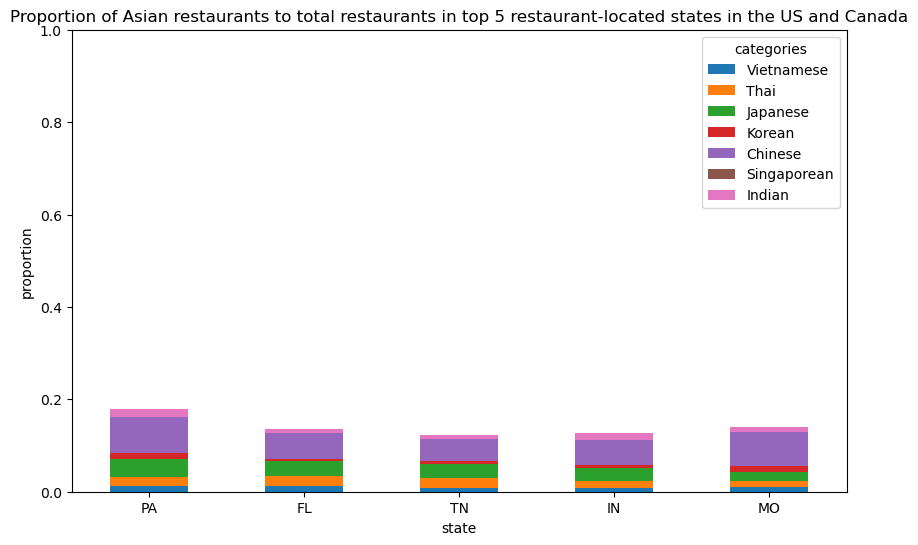

In [48]:
ax = ratio_asian_res_by_state_series.unstack().plot(kind='bar', figsize=(10, 6), y=["Vietnamese", "Thai", "Japanese", "Korean", "Chinese", "Singaporean", "Indian"], rot=0, stacked=True)
ax.set_ylabel('proportion')
ax.set_ylim((0,1))
ax.set_title('Proportion of Asian restaurants to total restaurants in top 5 restaurant-located states in the US and Canada');

Nhà hàng châu Á đang xét chiếm giao động khoảng 20% tổng số nhà hàng. 

Ta thấy 2 bang ở Canada số lượng nhà hàng Châu Á chiếm khá đáng kể, Ontario có nhiều nhà hàng nhất và cũng có tỷ lệ nhà hàng Châu Á nhiều nhất trong nhóm.

Một điều khá thú vị là QC (Quebec - Canada) tỷ lệ nhà hàng Việt Nam chiếm phần khá ấn tượng trong số nhà hàng Á, cao hơn cả Thái Lan, India, Korea; thậm chí ngang ngửa với China và Japan. Tìm hiểu thêm mới biết, Québec là bang với cộng đồng người Việt đông thứ 2 (https://en.wikipedia.org/wiki/Vietnamese_Canadians#History_and_demographics) sau Ontario, và người Việt ở cũng đã đến đây từ lâu (https://vi.wikipedia.org/wiki/Ng%C6%B0%E1%BB%9Di_Canada_g%E1%BB%91c_Vi%E1%BB%87t#Tr%C6%B0%E1%BB%9Bc_1975).

### Lượng reviews của người dùng cho các nhà hàng theo từng tháng thay đổi như thế nào?

Em sẽ thực hiện theo các bước sau:

    Bước 1: Thêm 2 cột year và month vào reviews_df.

    Bước 2: Lấy ra những dòng có year mà năm gần nhất. 

    Bước 3: Tính dataframe `num_reviews_each_month_df` gồm có 5 cột (2014, 2015, 2016, 2017, 2018) ứng với số lượng review theo các tháng của 5 năm, và 12 dòng ứng với 12 tháng.

    Bước 4: Vẽ biểu đồ đường dạng line (ứng với 5 năm), trong đó trục hoành là tháng và trục tung là số lượng review.

In [43]:
df = reviews_df
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [44]:
max_year = df['year'].max()
df = df[max_year - df['year'] < 5]

In [45]:
num_reviews_each_month_df = df.groupby(['year','month'])['review_id'].count().unstack(level='year')
num_reviews_each_month_df

year,2014,2015,2016,2017,2018
month,,,,,
1,51147.0,71849.0,89995.0,94457.0,104640.0
2,47114.0,66395.0,88004.0,90085.0,100004.0
3,54939.0,78035.0,93927.0,102373.0,119213.0
4,54817.0,75784.0,92886.0,102205.0,115534.0
5,58075.0,80100.0,94926.0,104915.0,115846.0
6,58963.0,82515.0,96589.0,105827.0,116064.0
7,69440.0,90838.0,104258.0,116050.0,126571.0
8,69443.0,92089.0,99052.0,111431.0,120381.0
9,60443.0,80668.0,89115.0,102393.0,103980.0


Do ngày cuối cùng trong dữ liệu của reviews là 14-11-2018 nên nếu lấy cả tháng 11 thì sẽ không đủ, vì vậy nên em sẽ không lấy dữ liệu của tháng 11.

In [46]:
num_reviews_each_month_df.loc[11,2018] = np.NaN
num_reviews_each_month_df

year,2014,2015,2016,2017,2018
month,,,,,
1,51147.0,71849.0,89995.0,94457.0,104640.0
2,47114.0,66395.0,88004.0,90085.0,100004.0
3,54939.0,78035.0,93927.0,102373.0,119213.0
4,54817.0,75784.0,92886.0,102205.0,115534.0
5,58075.0,80100.0,94926.0,104915.0,115846.0
6,58963.0,82515.0,96589.0,105827.0,116064.0
7,69440.0,90838.0,104258.0,116050.0,126571.0
8,69443.0,92089.0,99052.0,111431.0,120381.0
9,60443.0,80668.0,89115.0,102393.0,103980.0


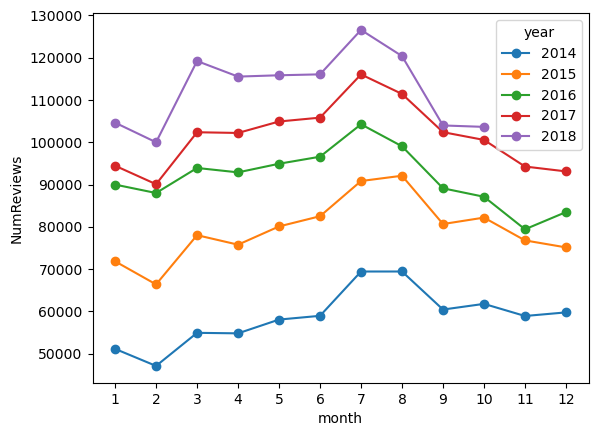

In [47]:
num_reviews_each_month_df.plot.line(marker='o')
plt.ylabel('NumReviews');
plt.xticks(range(1,13));

Việc đi ăn xong rồi review ở ngoài của người Mỹ là thay đổi theo từng tháng và đi theo một khuôn mẫu nhất định từng năm, đặc biệt là tháng 11 năm 2018 giảm mạnh, sau đó là hết dữ liệu, đạt ít nhất vào giai đoạn cuối năm trước đến đầu năm sau ( chạm đáy vào tháng 2 hay tháng 11) và tăng lên nhiều nhất vào các tháng mùa hè (nhất là tháng 7).

Theo ý kiến cá nhân của em, dựa vào một bài đăng bởi Nicole Georgiev trên Bluecart, vào thời điểm nhà hàng trở nên đông khách và bận rộn nhất là từ tháng 4 đến tháng 9. Hoặc đối với Denise Dayton viết trên bizfluent, mùa hè thường có thời tiết mát mẻ và một số ngày lễ lớn như ngày Quốc khánh của Mỹ, đồng thời các nhà hàng cũng có những ưu đãi như giảm giá hoặc khuyến mãi để làm tăng nhu cầu đi ăn của khách hàng.

Còn đối với những tháng cuối năm thì đa số các hộ gia đình thường có xu hướng đoàn tụ ở nhà sau một năm làm việc vất vả, hoặc là họ tiết kiệm tiền để đi mua sắm cuối năm. Nhưng suy cho cùng thì đó cũng là ý kiến cũng như cái nhìn chủ quan của em. 

Link hai bài đăng: (https://bizfluent.com/how-7795814-calculate-seat-turnover.html), (https://www.bluecart.com/blog/busy-restaurant-season#:~:text=In%20the%20restaurant%20industry%2C%20the,to%20determining%20the%20busy%20season.)   

### NHÌN LẠI QUÁ TRÌNH

## THUẬN LỢI, KHÓ KHĂN

Đồ án này làm em cảm thấy khá hài lòng, mặc dù chắc chắn sẽ có nhiều thiếu sót trong lúc thực hiện.

Khi lựa chọn dataset thì em có search được vài cái, nhưng một số chúng lại có quá ít thông tin nên em không thể tối ưu được lợi thế của pandas. Trong lúc tìm kiếm thì Kaggle lại recommend dataset của Yelp nên em ấn vào xem và quyết định chọn nó để làm đò án.  

Nhưng niềm vui có đó thì tất nhiên cũng có những cái khó và hụt hẫng đi kèm. Lúc tải dataset thì gần 10GB, em phải tốn gần 3 đến 4 tiếng mới có thể tải được về máy vì nó quá nặng nên thành ra dẫn đến việc đơ máy. Khi đọc data thì lâu lâu máy lại bị đơ, reset by force. May mắn file reviews có file reviews.csv nên em cũng dễ thở hơn, mặc dù còn một số sai sót về định dạng. 

Phần đặt câu hỏi: Lúc đầu cũng khá khó đối với em khi suy nghĩ ra câu hỏi và cách trả lời

## NHỮNG ĐIỀU CẦN HỌC HỎI

Em học được rất nhiều thứ qua đồ án này:

- Vận dụng kiến thức đã học, theo sự hướng dẫn, sự tổ chức notebook, cách code, ý tưởng của các thầy để từng bước làm theo, áp dụng lên dữ liệu, giải quyết bài toán từ dữ liệu.

- Cảm nhận rõ quy trình khoa học dữ liệu, làm quen với sự xuất hiện của những khó khăn bất ngờ ập tới. 

## NẾU CÓ THỜI GIAN SẼ LÀM THÊM GÌ?

Nếu có thời gian thêm thì em sẽ tìm cách đọc được toàn bộ file reviews, kể cả những cột em bỏ để tránh đơ máy, một trong số đó là cột text. Cột text chứa thông tin đánh giá cực kỳ quan trọng nếu muốn phân tích quan điểm, thích/ ghét, keywords, món nổi bật của quán,... Cho nên nếu đọc được text của hơn 6 triệu review em nghĩ sẽ có thể làm được và biết thêm một vài điều thú vị.

# REFERENCES
1.Các slide giảng dạy trên lớp (https://drive.google.com/drive/folders/1WBgeLNoWVuWRaGrp2i6Z4tAEn8IpFqpq)\
2.Các phần bài tập lý thuyết (HW1, HW2, HW3)\
3.Các phần bài tập thực hành (Lab1, Lab2, Lab3)\
4.https://towardsdatascience.com/converting-yelp-dataset-to-csv-using-pandas-2a4c8f03bd88 \
5.https://towardsdatascience.com/discover-your-next-favorite-restaurant-exploration-and-visualization-on-yelps-dataset-157d9799123c \
6.https://www.youtube.com/watch?v=hkF_oIm3lU4&t=637s
